In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with = engine)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
date_list = []

for row in session.query(measurement.date).all():
    date_list.append(row)

df_date = pd.DataFrame(date_list)
df_date.sort_values
print(df_date.max())

date    2017-08-23
dtype: object


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
cutoff = '2016-08-23'
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores

query1 = session.query(measurement.date, measurement.prcp).filter(measurement.date > cutoff).all()
query1
# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date
query1_df = pd.DataFrame(query1)
query1_df

query1_df.sort_values(by='date')
query1_df


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
query1_df['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(measurement.station).count()
num_stations

19550

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()


active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_temps = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').all()
temps_df = pd.DataFrame(most_active_station_temps)
min_temp = temps_df.min()
max_temp = temps_df.max()
avg_temp = temps_df.mean()
print(min_temp) 
print(max_temp) 
print(avg_temp)


tobs    54.0
dtype: float64
tobs    85.0
dtype: float64
tobs    71.663781
dtype: float64


<Axes: ylabel='Frequency'>

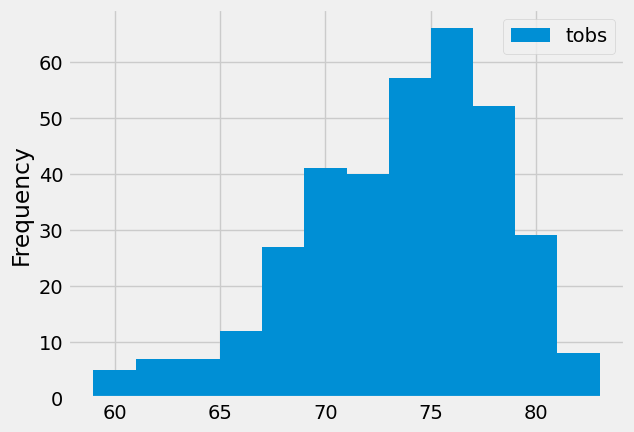

In [26]:
# Using the most active station id
cutoff_date = '2016-08-23'
last_12_months_temps = session.query(measurement.tobs).filter((measurement.station == 'USC00519281') & (measurement.date > cutoff_date)).all()
last_12_df = pd.DataFrame(last_12_months_temps)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_df.plot.hist(bins=12)

# Close Session

In [27]:
# Close Session
session.close()